In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint


In [20]:
df = pd.read_csv('TopicModeling_dominantTopik.csv',sep=';',encoding='ANSI')

In [21]:
df

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,CommunityName,Community
0,0,0,2.0,0.7456,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов К...,ecoterinburg,0
1,1,1,2.0,0.5086,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости А осознанных жителей все больше Пр...,ecoterinburg,0
2,2,2,1.0,0.4119,"россия, воздух, природа, лесной, проект, котор...",ЭкоСобытие Почему в Волге больше нельзя купать...,ecoterinburg,0
3,3,3,2.0,0.6295,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов от ...,ecoterinburg,0
4,4,4,3.0,0.3032,"фото, делиться, фотография, страница, часземля...",ЭкоНовости Итоги Майской прогулки ) Лампы рту...,ecoterinburg,0
5,5,5,7.0,0.4892,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Друзья Открыта регистрация на эколо...,ecoterinburg,0
6,6,6,2.0,0.8096,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоСобытие Акция раздельного сбора отходов |Чи...,ecoterinburg,0
7,7,7,7.0,0.2842,"пластик, который, пластиковый, пакет, одноразо...",Объявляем набор волонтеров на самую масштабную...,ecoterinburg,0
8,8,8,7.0,0.5217,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Открыт набор на масштабную посадку ...,ecoterinburg,0
9,9,9,7.0,0.7957,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Представляем новую настольную игру ...,ecoterinburg,0


In [22]:
df[df['Dominant_Topic']==9]

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,CommunityName,Community
89,89,89,9.0,0.4783,"рыба, область, покупатель, супермаркет, снежны...",С ДНЕМ ЭКОЛОГА РЕЗУЛЬТАТЫ ПРАЗДНИЧНОГО РОЗЫГРЫ...,ecoindustryru,1
499,499,499,9.0,0.3643,"рыба, область, покупатель, супермаркет, снежны...",Жители Уфы жалуются на неприятный запах в горо...,environmental_engineer,3
507,507,507,9.0,0.4260,"рыба, область, покупатель, супермаркет, снежны...",В Уфе будут высажены тематические аллеи В рамк...,environmental_engineer,3
1009,1009,1009,9.0,0.3504,"рыба, область, покупатель, супермаркет, снежны...",Классное видео с учёта дальневосточного аиста ...,wwf,8
1035,1035,1035,9.0,0.5025,"рыба, область, покупатель, супермаркет, снежны...",Дальневосточные аисты в Березовском заказнике ...,wwf,8
1046,1046,1046,9.0,0.3445,"рыба, область, покупатель, супермаркет, снежны...",Фильм «Эрбед соохор Снежный барс Бурятии» пред...,wwf,8
1082,1082,1082,9.0,0.3504,"рыба, область, покупатель, супермаркет, снежны...",Классное видео с учёта дальневосточного аиста ...,wwf,8
1098,1098,1098,9.0,0.5025,"рыба, область, покупатель, супермаркет, снежны...",Дальневосточные аисты в Березовском заказнике ...,wwf,8
1108,1108,1108,9.0,0.3546,"рыба, область, покупатель, супермаркет, снежны...",Какая рыба самая быстрая Сколько щупалец испо...,wwf,8
1114,1114,1114,9.0,0.2309,"рыба, область, покупатель, супермаркет, снежны...",Международному фестивалю «Земля снежного барса...,wwf,8


In [23]:
df['TopicName'] = df['Dominant_Topic']
df['TopicName'] = df['TopicName'].map({0: 'Китовая тюрьма', 1:'Загрязнение окружающей среды', 2:'Активизм', 3: 'Фотографии',
                                      4: 'Новости,обращения,ответы правительства', 5: 'Выбросы', 7: 'Пластик', 8: 'Пожары', 
                                      9: 'Фауна'})

In [24]:
df

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,CommunityName,Community,TopicName
0,0,0,2.0,0.7456,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов К...,ecoterinburg,0,Активизм
1,1,1,2.0,0.5086,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости А осознанных жителей все больше Пр...,ecoterinburg,0,Активизм
2,2,2,1.0,0.4119,"россия, воздух, природа, лесной, проект, котор...",ЭкоСобытие Почему в Волге больше нельзя купать...,ecoterinburg,0,Загрязнение окружающей среды
3,3,3,2.0,0.6295,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов от ...,ecoterinburg,0,Активизм
4,4,4,3.0,0.3032,"фото, делиться, фотография, страница, часземля...",ЭкоНовости Итоги Майской прогулки ) Лампы рту...,ecoterinburg,0,Фотографии
5,5,5,7.0,0.4892,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Друзья Открыта регистрация на эколо...,ecoterinburg,0,Пластик
6,6,6,2.0,0.8096,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоСобытие Акция раздельного сбора отходов |Чи...,ecoterinburg,0,Активизм
7,7,7,7.0,0.2842,"пластик, который, пластиковый, пакет, одноразо...",Объявляем набор волонтеров на самую масштабную...,ecoterinburg,0,Пластик
8,8,8,7.0,0.5217,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Открыт набор на масштабную посадку ...,ecoterinburg,0,Пластик
9,9,9,7.0,0.7957,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Представляем новую настольную игру ...,ecoterinburg,0,Пластик


In [25]:
df.drop(['Document_No', 'Topic_Perc_Contrib'], axis='columns', inplace=True)

In [26]:
df.drop(['count'], axis='columns', inplace=True)

KeyError: "['count'] not found in axis"

In [27]:
dfs = []
future_df = [[0.0 for x in range(10)] for y in range(10)]
for comm_number in range(10):
    tmp_df = df[df['Community']==comm_number]
    dfs.append(tmp_df)
    for topic_number in range(10):
        future_df[comm_number][topic_number] = (float)(len(tmp_df[tmp_df['Dominant_Topic']==topic_number].index))/(float)(len(tmp_df.index))

In [28]:
future_df

[[0.0,
  0.13636363636363635,
  0.4318181818181818,
  0.022727272727272728,
  0.022727272727272728,
  0.0,
  0.0,
  0.3181818181818182,
  0.06818181818181818,
  0.0],
 [0.0,
  0.15404699738903394,
  0.04960835509138381,
  0.0026109660574412533,
  0.6579634464751958,
  0.06266318537859007,
  0.0,
  0.05483028720626632,
  0.015665796344647518,
  0.0026109660574412533],
 [0.0,
  0.2413793103448276,
  0.27586206896551724,
  0.034482758620689655,
  0.10344827586206896,
  0.034482758620689655,
  0.0,
  0.13793103448275862,
  0.1724137931034483,
  0.0],
 [0.0,
  0.28688524590163933,
  0.30327868852459017,
  0.00819672131147541,
  0.04918032786885246,
  0.00819672131147541,
  0.0,
  0.22950819672131148,
  0.09836065573770492,
  0.01639344262295082],
 [0.0,
  0.08108108108108109,
  0.32432432432432434,
  0.0,
  0.02702702702702703,
  0.0,
  0.0,
  0.5675675675675675,
  0.0,
  0.0],
 [0.0,
  0.14285714285714285,
  0.42857142857142855,
  0.0,
  0.0,
  0.0,
  0.0,
  0.14285714285714285,
  0.285714

In [29]:
(float)(len(df[df['Community']==1].index))/(float)(len(df.index))

0.20221752903907075

In [30]:
prob_df = pd.DataFrame(future_df)

In [31]:
prob_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.136364,0.431818,0.022727,0.022727,0.000000,0.0,0.318182,0.068182,0.000000
1,0.000000,0.154047,0.049608,0.002611,0.657963,0.062663,0.0,0.054830,0.015666,0.002611
2,0.000000,0.241379,0.275862,0.034483,0.103448,0.034483,0.0,0.137931,0.172414,0.000000
3,0.000000,0.286885,0.303279,0.008197,0.049180,0.008197,0.0,0.229508,0.098361,0.016393
4,0.000000,0.081081,0.324324,0.000000,0.027027,0.000000,0.0,0.567568,0.000000,0.000000
5,0.000000,0.142857,0.428571,0.000000,0.000000,0.000000,0.0,0.142857,0.285714,0.000000
6,0.000000,0.090566,0.524528,0.000000,0.052830,0.000000,0.0,0.328302,0.003774,0.000000
7,0.000000,0.244898,0.204082,0.000000,0.000000,0.000000,0.0,0.448980,0.102041,0.000000
8,0.000000,0.465930,0.176796,0.138122,0.007366,0.000000,0.0,0.077348,0.095764,0.038674
9,0.022059,0.365196,0.129902,0.000000,0.014706,0.002451,0.0,0.313725,0.149510,0.002451


In [32]:
df_comm = df["CommunityName"]
df_comm.drop_duplicates(inplace=True)
df_comm= df_comm.reset_index(drop=True)
df_comm

0              ecoterinburg
1             ecoindustryru
2             club142440638
3    environmental_engineer
4         musora_bolshe_net
5            newmindecology
6                     rsbor
7                   rus_eco
8                       wwf
9             greenpeace_ru
Name: CommunityName, dtype: object

In [33]:
df_=pd.concat([df_comm,prob_df],axis=1)


In [34]:
df_

,CommunityName,0,1,2,3,4,5,6,7,8,9
0,ecoterinburg,0.000000,0.136364,0.431818,0.022727,0.022727,0.000000,0.0,0.318182,0.068182,0.000000
1,ecoindustryru,0.000000,0.154047,0.049608,0.002611,0.657963,0.062663,0.0,0.054830,0.015666,0.002611
2,club142440638,0.000000,0.241379,0.275862,0.034483,0.103448,0.034483,0.0,0.137931,0.172414,0.000000
3,environmental_engineer,0.000000,0.286885,0.303279,0.008197,0.049180,0.008197,0.0,0.229508,0.098361,0.016393
4,musora_bolshe_net,0.000000,0.081081,0.324324,0.000000,0.027027,0.000000,0.0,0.567568,0.000000,0.000000
5,newmindecology,0.000000,0.142857,0.428571,0.000000,0.000000,0.000000,0.0,0.142857,0.285714,0.000000
6,rsbor,0.000000,0.090566,0.524528,0.000000,0.052830,0.000000,0.0,0.328302,0.003774,0.000000
7,rus_eco,0.000000,0.244898,0.204082,0.000000,0.000000,0.000000,0.0,0.448980,0.102041,0.000000
8,wwf,0.000000,0.465930,0.176796,0.138122,0.007366,0.000000,0.0,0.077348,0.095764,0.038674
9,greenpeace_ru,0.022059,0.365196,0.129902,0.000000,0.014706,0.002451,0.0,0.313725,0.149510,0.002451


In [35]:
df_.columns = ['CommunityName','Китовая тюрьма', 'Загрязнение окружающей среды', 'Активизм', 'Фотографии',
             'Новости,обращения,ответы правительства', 'Выбросы', 'non', 'Пластик', 'Пожары', 'Фауна']

In [36]:
df_.drop(['non'], axis='columns', inplace=True)

In [37]:
df_

,CommunityName,Китовая тюрьма,Загрязнение окружающей среды,Активизм,Фотографии,"Новости,обращения,ответы правительства",Выбросы,Пластик,Пожары,Фауна
0,ecoterinburg,0.000000,0.136364,0.431818,0.022727,0.022727,0.000000,0.318182,0.068182,0.000000
1,ecoindustryru,0.000000,0.154047,0.049608,0.002611,0.657963,0.062663,0.054830,0.015666,0.002611
2,club142440638,0.000000,0.241379,0.275862,0.034483,0.103448,0.034483,0.137931,0.172414,0.000000
3,environmental_engineer,0.000000,0.286885,0.303279,0.008197,0.049180,0.008197,0.229508,0.098361,0.016393
4,musora_bolshe_net,0.000000,0.081081,0.324324,0.000000,0.027027,0.000000,0.567568,0.000000,0.000000
5,newmindecology,0.000000,0.142857,0.428571,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000
6,rsbor,0.000000,0.090566,0.524528,0.000000,0.052830,0.000000,0.328302,0.003774,0.000000
7,rus_eco,0.000000,0.244898,0.204082,0.000000,0.000000,0.000000,0.448980,0.102041,0.000000
8,wwf,0.000000,0.465930,0.176796,0.138122,0.007366,0.000000,0.077348,0.095764,0.038674
9,greenpeace_ru,0.022059,0.365196,0.129902,0.000000,0.014706,0.002451,0.313725,0.149510,0.002451


In [38]:
df_plot = df['Dominant_Topic']
#df_plot['TopicName'] = df['TopicName']
df_plot

0       2.0
1       2.0
2       1.0
3       2.0
4       3.0
5       7.0
6       2.0
7       7.0
8       7.0
9       7.0
10      2.0
11      7.0
12      2.0
13      2.0
14      1.0
15      2.0
16      7.0
17      1.0
18      8.0
19      7.0
20      2.0
21      2.0
22      2.0
23      1.0
24      2.0
25      7.0
26      2.0
27      7.0
28      7.0
29      7.0
       ... 
1864    0.0
1865    1.0
1866    7.0
1867    7.0
1868    7.0
1869    7.0
1870    7.0
1871    1.0
1872    7.0
1873    7.0
1874    1.0
1875    1.0
1876    7.0
1877    7.0
1878    1.0
1879    7.0
1880    7.0
1881    7.0
1882    7.0
1883    7.0
1884    8.0
1885    8.0
1886    8.0
1887    8.0
1888    1.0
1889    0.0
1890    8.0
1891    8.0
1892    8.0
1893    2.0
Name: Dominant_Topic, Length: 1894, dtype: float64

In [39]:
df['count'] = 1
df_result = df.groupby(df['TopicName']).count()

In [40]:
df_result.drop(['Dominant_Topic', 'Unnamed: 0', 'Keywords', 'Text', 'CommunityName', 'Community'], axis='columns', inplace=True)
df_result

,TopicName,count
TopicName,,
Активизм,399,399
Выбросы,27,27
Загрязнение окружающей среды,550,550
Китовая тюрьма,9,9
"Новости,обращения,ответы правительства",287,287
Пластик,369,369
Пожары,149,149
Фауна,25,25
Фотографии,79,79


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000233859724A8>],
      dtype=object)

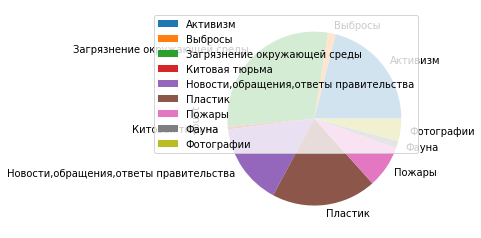

In [101]:
df_result.plot.pie(y='count',subplots=True)

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

NameError: name 'col' is not defined

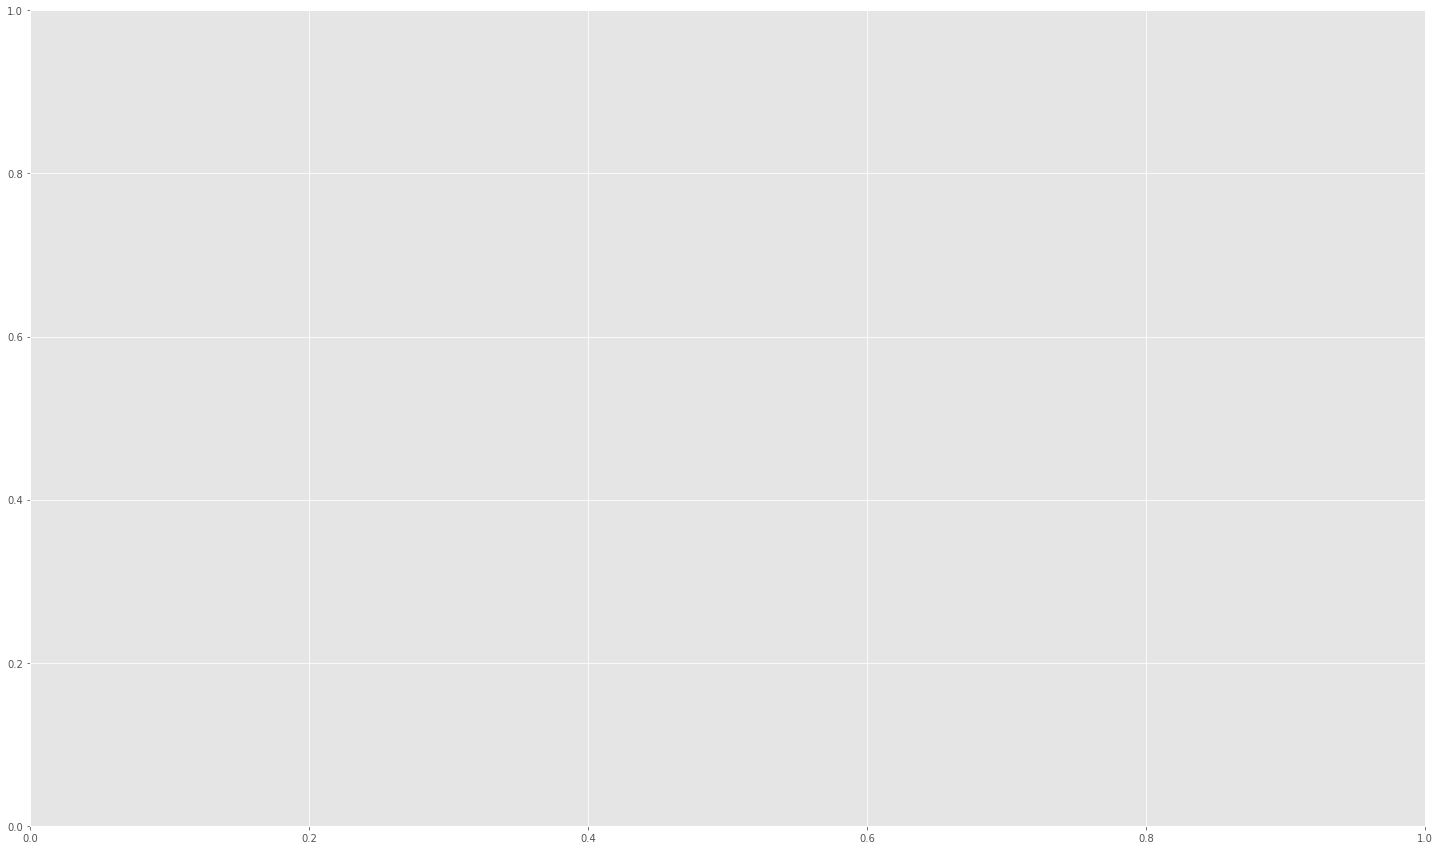

In [42]:
f, axes = plt.subplots(figsize=(25,15))
data = df_result[col]

NameError: name 'ax' is not defined

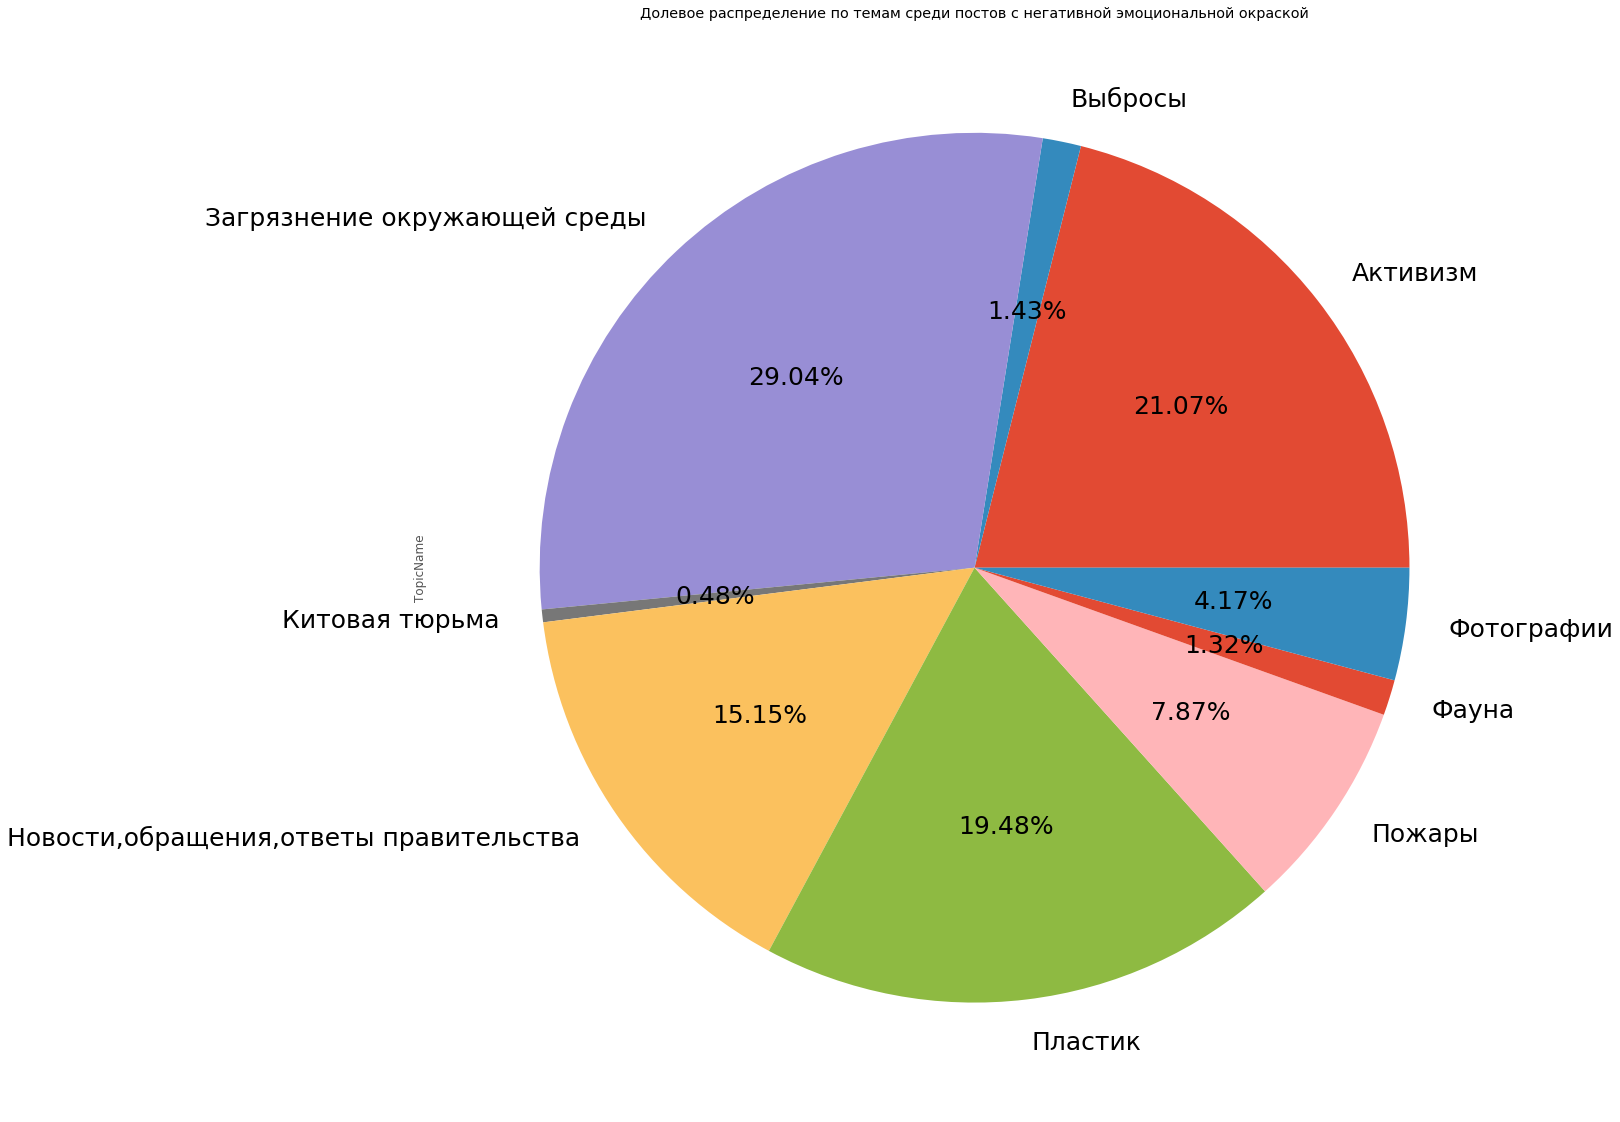

In [43]:
f, axes = plt.subplots(figsize=(20,20))
#for ax, col in zip(axes, df_result.columns):
df_result[df_result.columns[0]].plot(kind='pie', autopct='%1.2f%%', labels=df_result.index, 
                                     title='Долевое распределение по темам среди постов с негативной эмоциональной окраской',
                                     fontsize=25)
ax.legend(loc=3)
plt.savefig('plot.png', format='png')
plt.show()

In [91]:
df_.to_csv("TopicModeling_Probs.csv", sep=';', encoding='ANSI')

In [136]:
plt.tight_layout()
plt.savefig('plot.png', format='png')

<Figure size 432x288 with 0 Axes>

In [145]:
df.to_csv("TopicModeling_.csv", sep=';', encoding='ANSI')